概要：上节提到向量和标量的本质区别是方向性，正因为这个属性才可能给向量赋予更多的含义；本节讨论矩阵，矩阵就是向量的集合。

其实是个列表。

1.矩阵是标量的一个矩形数组（可以是整数，浮点数，复合数据等），以行列的形式组织，例如：\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

也可以认为矩阵是向量的列表，比如以上是两行的三维向量，或者是三列的两维向量；矩阵可以高效的执行向量运算，比如线性变换，包括旋转，
缩放，转换等。

python中的矩阵：

In [1]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

In [ ]:
numpy提供的矩阵运算更高效：

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np

A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

矩阵通常用大写字母表示。

矩阵的大小：

In [3]:
A.shape

(2, 3)

矩阵的元素数目：

In [4]:
A.size

6

矩阵的索引：

In [5]:
A[1,2]  # 2nd row, 3rd column

60

得到第一行的数据：

In [6]:
A[1, :]  # 2nd row vector (as a 1D array)

array([40, 50, 60])

得到第二列的数据：

In [8]:
A[:, 2]  # 3rd column vector (as a 1D array)

array([30, 60])

得到第一行的数据：

In [9]:
A[1:2, :]  # rows 2 to 3 (excluded): this returns row 2 as a one-row matrix

array([[40, 50, 60]])

2.方形矩阵，上三角矩阵，下三角矩阵，对角矩阵，单位矩阵。

方形矩阵指行数和列数相等，如：

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

上三角矩阵指对角线以下数值为0：
\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

下三角矩阵指对角线以上数值为0：

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

对角矩阵指既是上三角矩阵又是下三角矩阵：

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

对角矩阵可以如下方式创建：

In [11]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

单位矩阵指，行列数相等，且是对角矩阵，并且对角线上的值都为1，记做$I_n$，n为行列数，如：

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

用eye函数创建：

In [13]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

3.矩阵加法。

两个矩阵大小要相同，才能做矩阵加法：

In [14]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [18]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

矩阵加法是可交换的：

In [17]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

矩阵加法是相关联的：

In [19]:
C = np.array([[100,200,300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [20]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

4.标量和矩阵的乘法。

在numpy中，我们用"*"来标记标量和矩阵的乘法：

In [21]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

很明显，该乘法是可交换和相关联的。

5.矩阵乘法。

矩阵乘法，M矩阵是$m \times n$，R矩阵是$n \times q$，那么它们可以相乘，结果矩阵的大小是$m \times q$。

在numpy中，用dot计算矩阵乘法：

In [22]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

结果矩阵的每个元素，都是原来矩阵对应行列的点积，如第二行第三列的值2910，就是A的第二行和D的第三列的点积（每个元素相乘之和）：

In [23]:
40*5 + 50*17 + 60*31

2910

如果第一个矩阵的列数，不等于第二个矩阵行数，那么会报错：

In [24]:
try:
    D.dot(A)
except ValueError as e:
    print("ValueError:", e)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


这说明矩阵乘法不是可交换的。

矩阵乘法是相关联的， $Q(RS) = (QR)S$：

In [25]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.dot(D).dot(G)     # (AB)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [26]:
A.dot(D.dot(G))     # A(BG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

针对矩阵加法，矩阵乘法可分步运算，即$(Q + R)S = QS + RS$：

In [27]:
(A + B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [28]:
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

和单位矩阵相乘，有以下特点：

$M I_n = I_m M = M$

$MI = IM = M$

如：

In [29]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [30]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [31]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

注意numpy中“*”执行的元素之间的乘法，不是矩阵乘法：

In [32]:
A * B   # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

6.矩阵转置。

即矩阵的行列互换，行变成列，列变成行：

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

在numpy中，用T实现：

In [33]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [34]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

转置对于矩阵加法是可分步运算的，即$(Q + R)^T = Q^T + R^T$，如：

In [35]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [36]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

点积的转置，有$(Q \cdot R)^T = R^T \cdot Q^T$，注意顺序，如：

In [37]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [38]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

对称矩阵指矩阵和它的转置相等，即$M^T = M$，如：

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

7.图形化矩阵。

创建一个$2 \times 4$的矩阵：

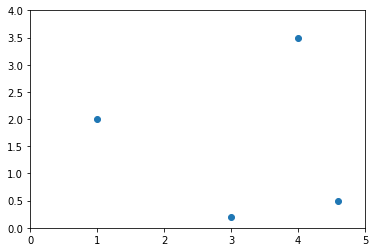

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

将向量连接起来：

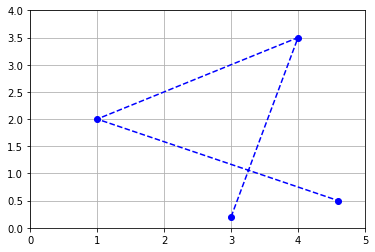

In [41]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

或者用多边形来展示：

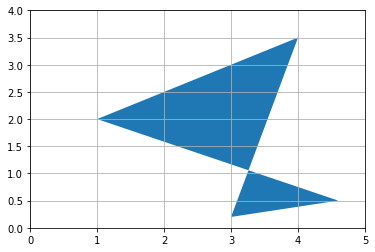

In [42]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

我们知道，向量加法代表几何转换，标量乘法表示向量的缩放，点积表示在向量轴上的投影，矩阵运算在几何上也有很多含义。

8.矩阵加法-多重几何转换。

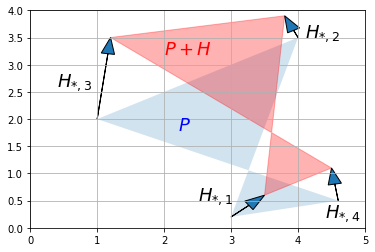

In [44]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

可以看到，矩阵的位置被转换了，我们试试向量值一样的情况，得到的是简单的几何转换：

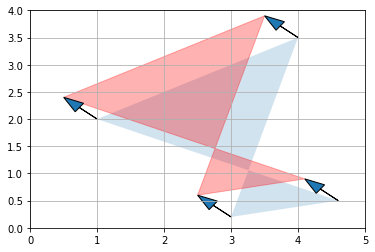

In [45]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

下面看看标量乘法，那就是矩阵的缩放了：

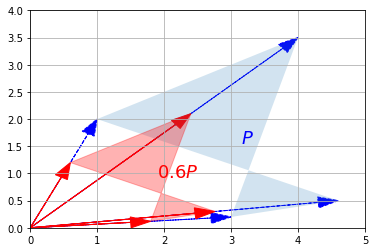

In [46]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

可以看到，矩阵被缩小了。

9.矩阵乘法-在向量轴上的投影

定义一个矩阵，行向量位于X轴：

In [47]:
U = np.array([[1, 0]])

计算$U \cdot P$

In [48]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

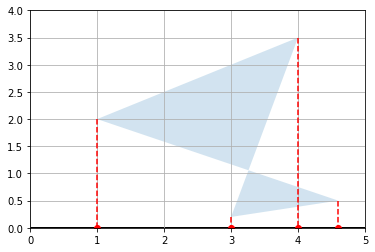

In [49]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

我们看到，结果矩阵的值都在X轴上。

我们在看看投影在一条斜线上，该斜线和水平夹角是30度：

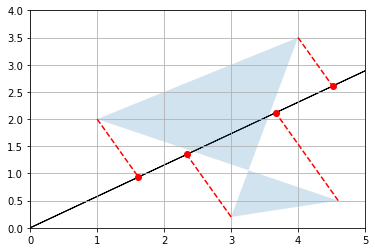

In [50]:
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)